# 📦 Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 📂 Load Data

In [22]:
togo_df = pd.read_csv('../data/raw/togo-dapaong_qc.csv', parse_dates=['Timestamp'])

# 🧭 Overview

In [23]:

print("🔹 Data Shape:", togo_df.shape)
print("🔹 Columns:", togo_df.columns.tolist())
display(togo_df.head())

🔹 Data Shape: (525600, 19)
🔹 Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# 📊 Summary Statistics

In [24]:

display(togo_df.describe())

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


# 🧼 Missing Values

In [25]:

missing = togo_df.isna().sum()
missing_percent = togo_df.isna().mean() * 100
print("Missing Value Summary:")
print(missing[missing > 0])
print("\n❗Columns with >5% missing:")
print(missing_percent[missing_percent > 5])

Missing Value Summary:
Comments    525600
dtype: int64

❗Columns with >5% missing:
Comments    100.0
dtype: float64


# 🚨 Outlier Detection


In [26]:

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = togo_df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"⚠️ Outlier rows count: {outliers.sum()}")

⚠️ Outlier rows count: 9251


# 🔧 Cleaning: Fill missing with median

In [27]:

togo_df[columns_to_check] = togo_df[columns_to_check].fillna(togo_df[columns_to_check].median())

# 💾 Save Cleaned Data (excluded from git)

In [28]:

togo_df.to_csv('../data/processed/togo_clean.csv', index=False)

# 🕒 Time Series Analysis

c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


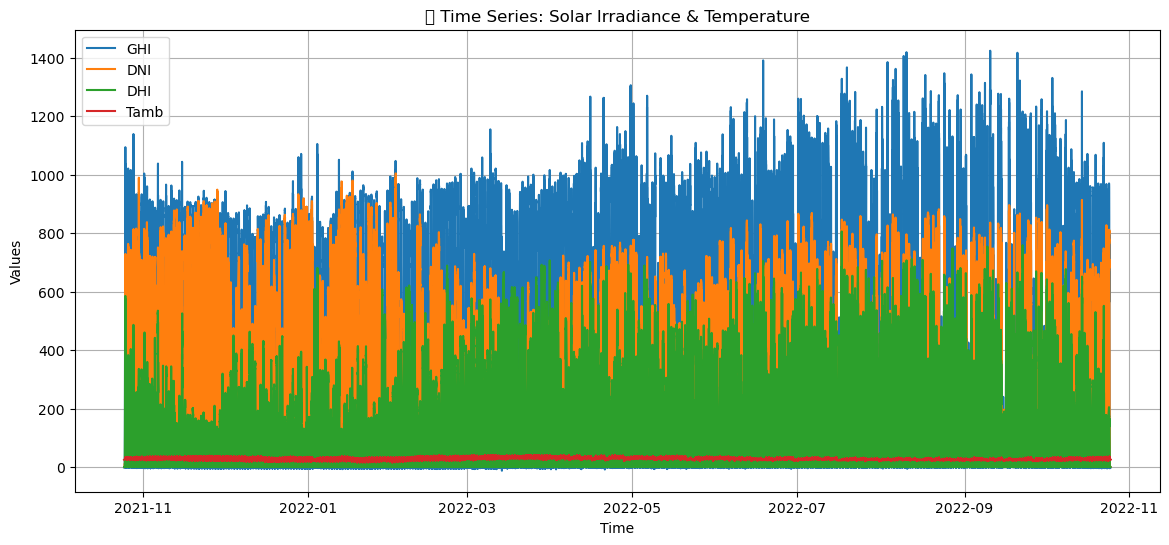

In [29]:
time_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
plt.figure(figsize=(14, 6))
for col in time_cols:
    plt.plot(togo_df['Timestamp'], togo_df[col], label=col)
plt.legend()
plt.title('⏳ Time Series: Solar Irradiance & Temperature')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# 🧽 Cleaning Effect


Text(0, 0.5, 'Average Reading')

c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129533 (\N{SPONGE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129533 (\N{SPONGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


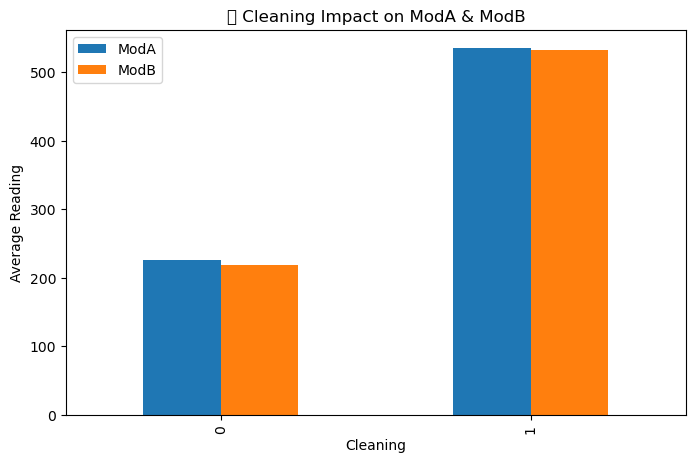

In [30]:
togo_df['Cleaning'] = togo_df['Cleaning'].astype(int)
cleaning_avg = togo_df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_avg.plot(kind='bar', title='🧽 Cleaning Impact on ModA & ModB', figsize=(8, 5))
plt.ylabel('Average Reading')

# 🔗 Correlation Heatmap


c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


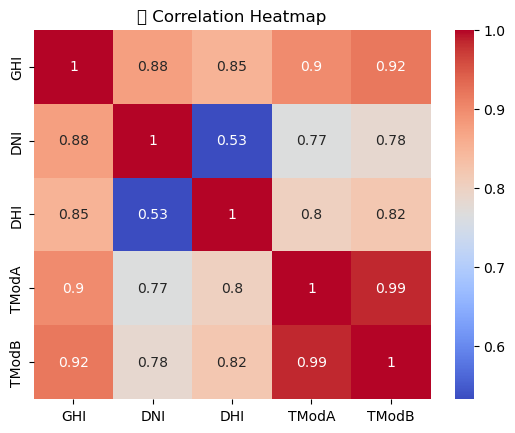

In [31]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(togo_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('📈 Correlation Heatmap')
plt.show()

# 🌬️ Wind vs GHI


c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


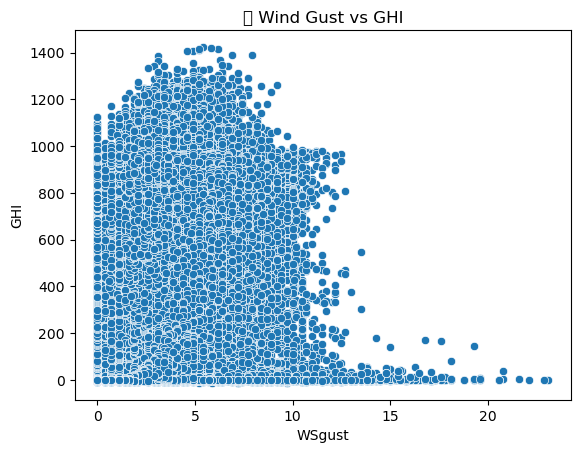

In [32]:
sns.scatterplot(x='WSgust', y='GHI', data=togo_df)
plt.title('💨 Wind Gust vs GHI')
plt.show()

# 💧 Humidity vs Temperature & GHI


c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


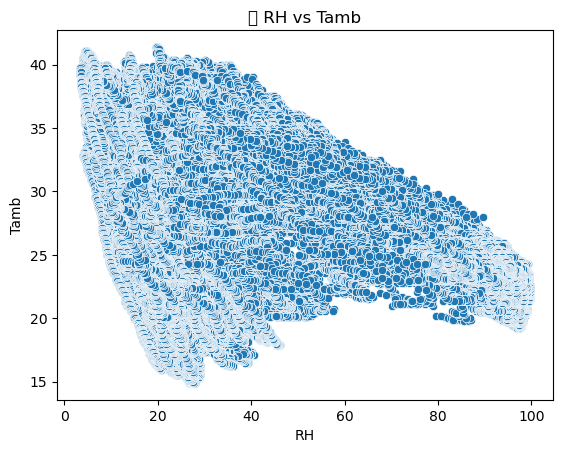

c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


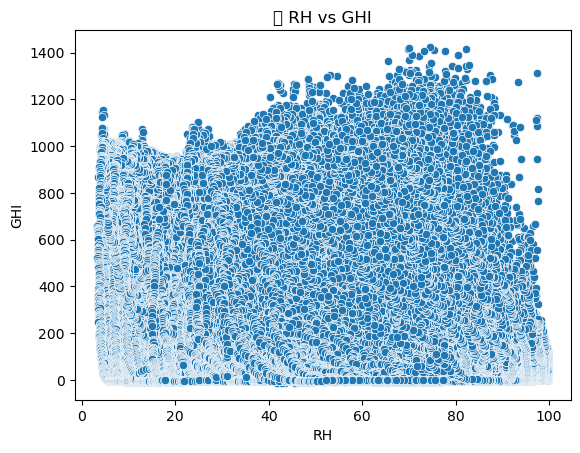

In [33]:
sns.scatterplot(x='RH', y='Tamb', data=togo_df)
plt.title('💧 RH vs Tamb')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=togo_df)
plt.title('💧 RH vs GHI')
plt.show()

# 📊 Histograms

c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


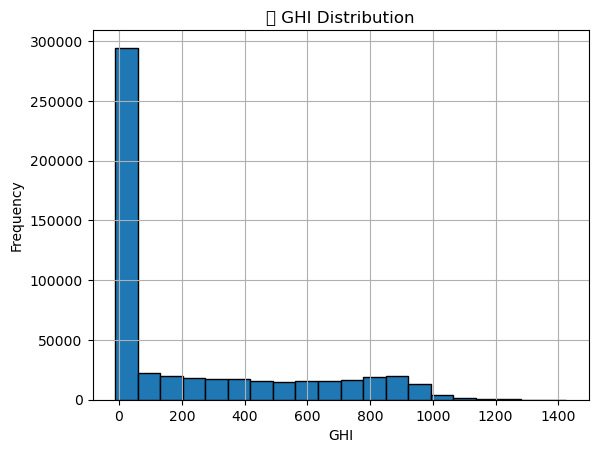

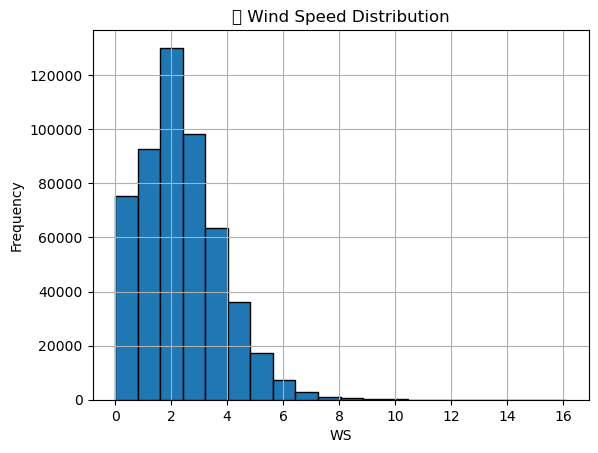

In [34]:

togo_df['GHI'].hist(bins=20, edgecolor='black')
plt.title('📊 GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

togo_df['WS'].hist(bins=20, edgecolor='black')
plt.title('📊 Wind Speed Distribution')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.show()

# 🔵 Bubble Chart: GHI vs Tamb

c:\Users\Eldan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


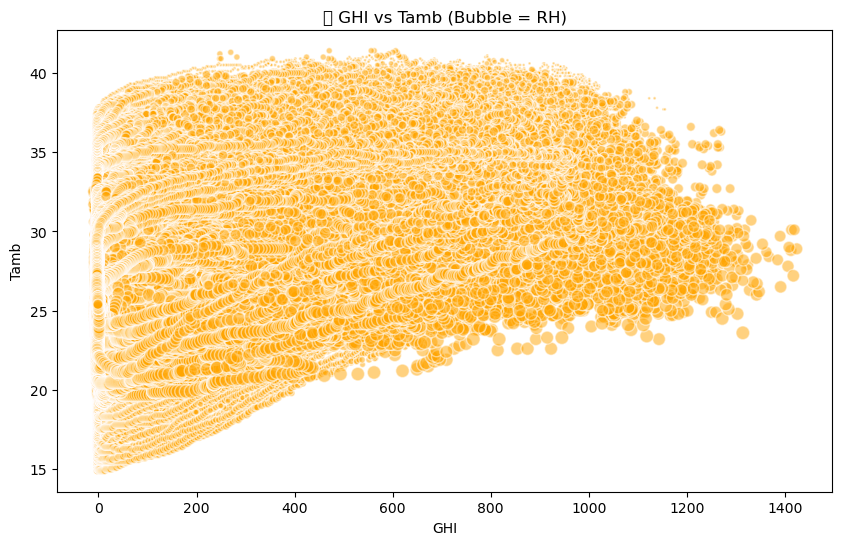

In [35]:

plt.figure(figsize=(10, 6))
plt.scatter(togo_df['GHI'], togo_df['Tamb'], s=togo_df['RH'], alpha=0.5, c='orange', edgecolors='w')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('🔵 GHI vs Tamb (Bubble = RH)')
plt.show()